In [119]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 

df=pd.read_csv('Food_Delivery_Times.csv')
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [120]:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [121]:
df.tail()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55
999,103,6.63,Foggy,Low,Night,Scooter,24,3.0,58


In [122]:
df.shape

(1000, 9)

In [123]:
df.columns

Index(['Order_ID', 'Distance_km', 'Weather', 'Traffic_Level', 'Time_of_Day',
       'Vehicle_Type', 'Preparation_Time_min', 'Courier_Experience_yrs',
       'Delivery_Time_min'],
      dtype='object')

In [124]:
df.isna().sum()

Order_ID                   0
Distance_km                0
Weather                   30
Traffic_Level             30
Time_of_Day               30
Vehicle_Type               0
Preparation_Time_min       0
Courier_Experience_yrs    30
Delivery_Time_min          0
dtype: int64

In [125]:
df.dtypes

Order_ID                    int64
Distance_km               float64
Weather                    object
Traffic_Level              object
Time_of_Day                object
Vehicle_Type               object
Preparation_Time_min        int64
Courier_Experience_yrs    float64
Delivery_Time_min           int64
dtype: object

In [126]:
v1=df['Weather'].value_counts()
v1

Weather
Clear    470
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64

Text(0.5, 1.0, 'Weather value counts')

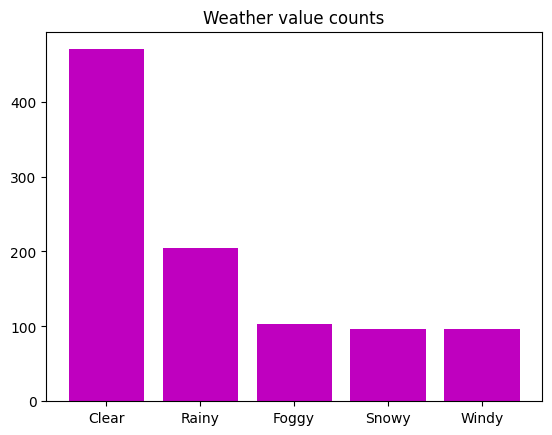

In [127]:
plt.bar(v1.index,v1.values,color='m')
plt.title('Weather value counts')

In [128]:
v2=df['Traffic_Level'].value_counts()
v2

Traffic_Level
Medium    390
Low       383
High      197
Name: count, dtype: int64

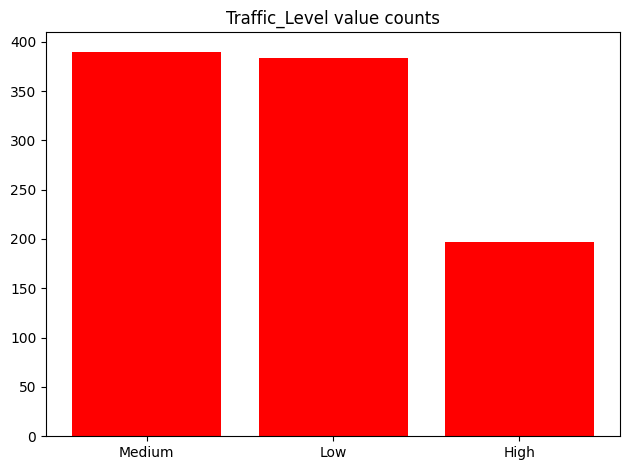

In [129]:
plt.bar(v2.index,v2.values,color='r')
plt.title('Traffic_Level value counts')
plt.tight_layout()

In [130]:
v3=df['Time_of_Day'].value_counts()
v3

Time_of_Day
Morning      308
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64

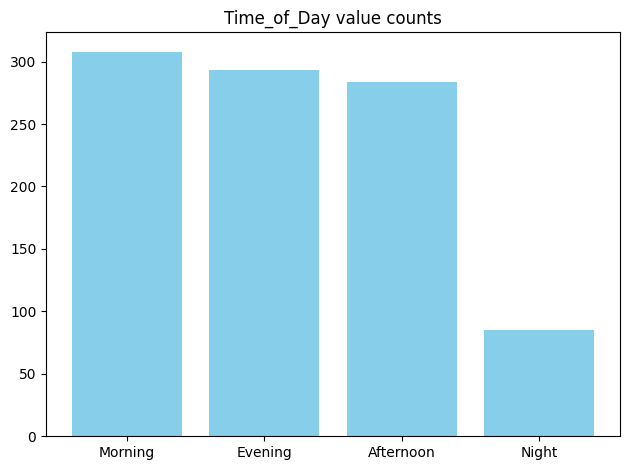

In [131]:
plt.bar(v3.index,v3.values,color='skyblue')
plt.title('Time_of_Day value counts')
plt.tight_layout()

In [132]:
v4=df['Vehicle_Type'].value_counts()
v4

Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64

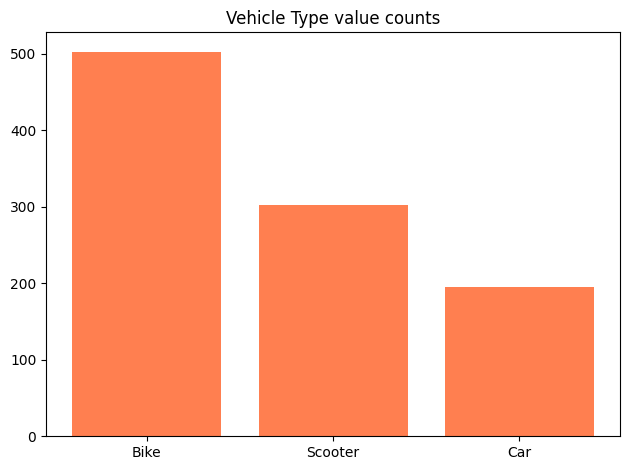

In [133]:
plt.bar(v4.index,v4.values,color='coral')
plt.title('Vehicle Type value counts')
plt.tight_layout()

In [134]:
df['Courier_Experience_yrs'].unique()

array([ 1.,  2.,  5.,  9.,  6.,  4.,  7., nan,  3.,  8.,  0.])

In [135]:
#handling missing values

df['Weather'].fillna('Unknown',inplace=True)
df['Traffic_Level'].fillna('Unknown',inplace=True)
df['Time_of_Day'].fillna('Unknown',inplace=True)
df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].mode() [0],inplace=True)

df.isna().sum()

Order_ID                  0
Distance_km               0
Weather                   0
Traffic_Level             0
Time_of_Day               0
Vehicle_Type              0
Preparation_Time_min      0
Courier_Experience_yrs    0
Delivery_Time_min         0
dtype: int64

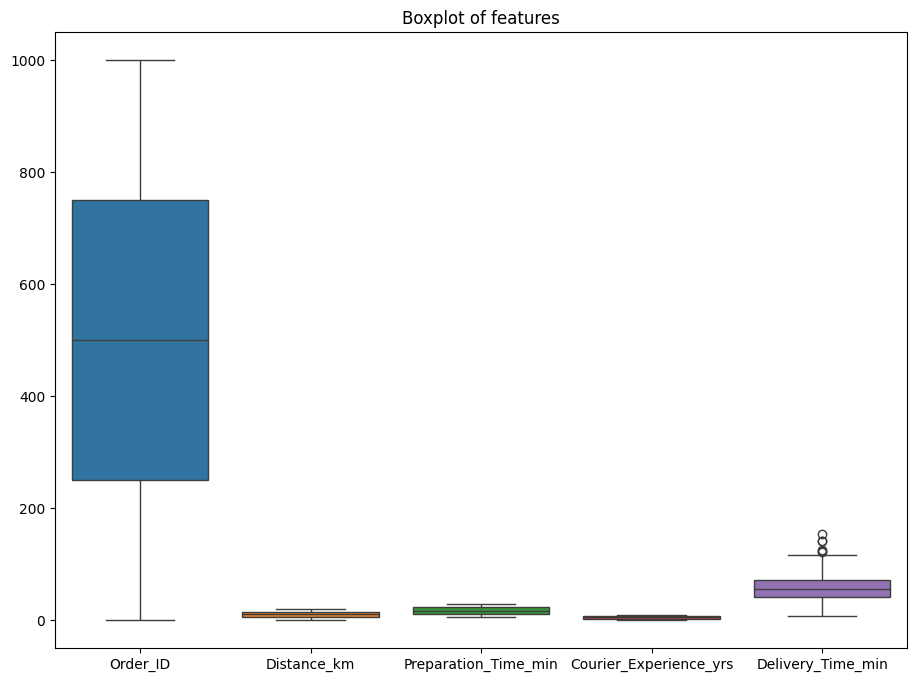

In [136]:
num_cols=df.select_dtypes(include=[np.number]).columns

plt.figure(figsize=(11,8))
sb.boxplot(data=df[num_cols])
plt.title('Boxplot of features')
plt.show()

In [137]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder 

enc=LabelEncoder()

df['Weather']=enc.fit_transform(df['Weather'])
df['Traffic_Level']=enc.fit_transform(df['Traffic_Level'])
df['Time_of_Day']=enc.fit_transform(df['Time_of_Day'])
df['Vehicle_Type']=enc.fit_transform(df['Vehicle_Type'])

df


,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,5,1,0,2,12,1.0,43
1,738,16.42,0,2,1,0,20,2.0,84
2,741,9.52,1,1,3,2,28,1.0,59
3,661,7.44,2,2,0,2,5,1.0,37
4,412,19.03,0,1,2,0,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,0,0,1,1,13,3.0,54
996,271,16.28,2,1,2,2,8,9.0,71
997,861,15.62,3,0,1,2,26,2.0,81
998,436,14.17,0,1,0,0,8,0.0,55


In [138]:
df.drop(['Order_ID'],axis=1,inplace=True)
df

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,5,1,0,2,12,1.0,43
1,16.42,0,2,1,0,20,2.0,84
2,9.52,1,1,3,2,28,1.0,59
3,7.44,2,2,0,2,5,1.0,37
4,19.03,0,1,2,0,16,5.0,68
...,...,...,...,...,...,...,...,...
995,8.50,0,0,1,1,13,3.0,54
996,16.28,2,1,2,2,8,9.0,71
997,15.62,3,0,1,2,26,2.0,81
998,14.17,0,1,0,0,8,0.0,55


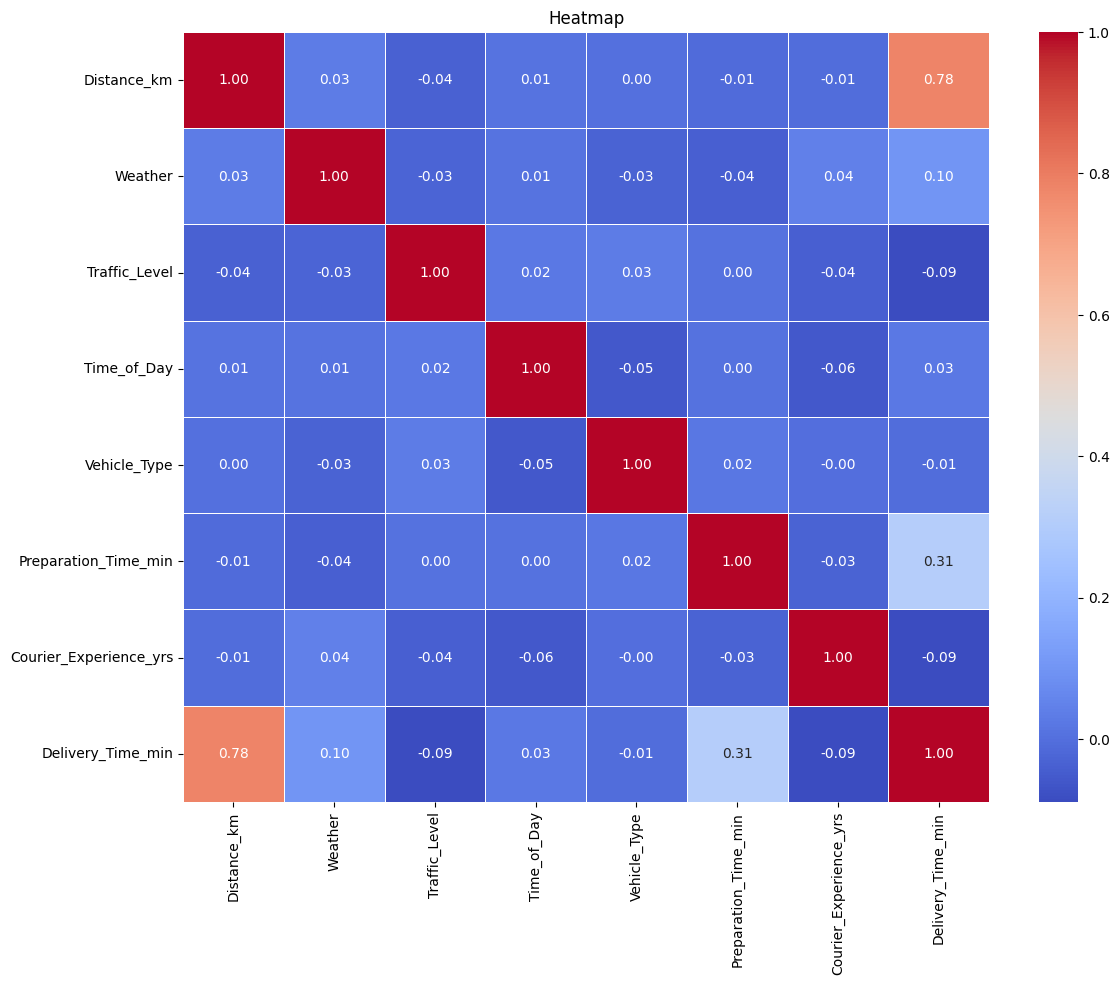

In [139]:
corr_mtx=df.corr()
plt.figure(figsize=(13,10))
sb.heatmap(corr_mtx,annot=True,cmap="coolwarm",fmt=".2f",linewidths=0.5)
plt.title("Heatmap")
plt.show()

In [140]:
x=df.drop(['Delivery_Time_min'],axis=1)
x

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
0,7.93,5,1,0,2,12,1.0
1,16.42,0,2,1,0,20,2.0
2,9.52,1,1,3,2,28,1.0
3,7.44,2,2,0,2,5,1.0
4,19.03,0,1,2,0,16,5.0
...,...,...,...,...,...,...,...
995,8.50,0,0,1,1,13,3.0
996,16.28,2,1,2,2,8,9.0
997,15.62,3,0,1,2,26,2.0
998,14.17,0,1,0,0,8,0.0


In [141]:
y=df['Delivery_Time_min']
y

0      43
1      84
2      59
3      37
4      68
       ..
995    54
996    71
997    81
998    55
999    58
Name: Delivery_Time_min, Length: 1000, dtype: int64

In [142]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
541,16.30,1,1,2,1,12,1.0
440,7.67,5,1,2,1,9,2.0
482,19.41,5,1,2,0,11,8.0
422,12.74,0,1,3,2,18,0.0
778,11.62,0,1,0,0,9,8.0
...,...,...,...,...,...,...,...
106,17.59,0,1,2,0,24,6.0
270,9.39,0,1,2,0,14,2.0
860,16.38,0,2,2,0,6,2.0
435,16.73,5,0,0,2,9,7.0


In [143]:
y_train

541    100
440     31
482     62
422     67
778     33
      ... 
106     69
270     37
860     51
435     71
102     28
Name: Delivery_Time_min, Length: 700, dtype: int64

In [144]:
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred

array([ 29.,  73.,  41.,  37., 105.,  46.,  74.,  35.,  35.,  60.,  83.,
        52.,  27.,  96.,  76.,  92.,  25.,  75.,  43.,  63.,  75.,  29.,
        83.,  65.,  65.,  34.,  92.,  22.,  51.,  65.,  74.,  17.,  52.,
        44.,  75.,   8.,  65.,  59.,  51.,  76.,  79.,  36.,  83.,  75.,
        70.,  15.,  88.,  70.,  70.,  41.,  59.,  63.,  43.,  77.,  59.,
        51.,  65.,  66.,  65.,  83.,  44.,  35.,  38.,  60.,  44.,  52.,
        74., 100.,  71., 116.,  54.,  26.,  92.,  25.,  65.,  59.,  27.,
        28.,  53.,  26.,  61.,  63.,  57.,  25.,  30.,  49.,  57.,  61.,
        38.,  67.,  37.,  65.,  50.,  48.,  51.,  71.,  48.,  53.,  54.,
        37.,  27.,  52.,  25.,  33.,  52.,  18.,  52.,  19., 126.,  26.,
        64.,  54.,  70.,  36., 106.,  26.,  65.,  71.,  70.,  61.,  68.,
        89.,  47.,  67.,  48.,  82.,  35.,  65.,  48.,  50.,  52.,  53.,
       116.,  49.,  68.,  50., 116.,  70.,  57.,  60.,  41.,  72.,  67.,
        60.,  49.,  51.,  75.,  66.,  71.,  28.,  2

In [145]:
y_test

521    32
737    68
740    39
660    44
411    85
       ..
468    46
935    63
428    37
7      46
155    66
Name: Delivery_Time_min, Length: 300, dtype: int64

In [146]:
df1=pd.DataFrame({'Actual_value':y_test,'Predicted_value':y_pred,'Difference':y_test-y_pred})
df1

,Actual_value,Predicted_value,Difference
521,32,29.0,3.0
737,68,73.0,-5.0
740,39,41.0,-2.0
660,44,37.0,7.0
411,85,105.0,-20.0
...,...,...,...
468,46,47.0,-1.0
935,63,60.0,3.0
428,37,30.0,7.0
7,46,51.0,-5.0


In [147]:
from sklearn.metrics import mean_absolute_percentage_error,r2_score

mape=mean_absolute_percentage_error(y_test,y_pred)
mape

0.19502203782259614

In [148]:
sc=r2_score(y_test,y_pred)
sc

0.5265621711890562

In [149]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

model1=DecisionTreeRegressor()

In [150]:
param={'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'splitter':['best','random'],'min_samples_split':[2,1,4,5,9],'min_samples_leaf':[2,1,4,5,9]}

clf=GridSearchCV(model1,param,cv=10,scoring='r2')
clf.fit(x_train,y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
400 fits failed out of a total of 2000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\DELL\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py", l

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'min_samples_leaf': [2, 1, 4, 5, 9],
                         'min_samples_split': [2, 1, 4, 5, 9],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [151]:
print(clf.best_params_)

{'criterion': 'absolute_error', 'min_samples_leaf': 9, 'min_samples_split': 4, 'splitter': 'best'}


In [152]:
model2=DecisionTreeRegressor(criterion='absolute_error',min_samples_leaf=9,min_samples_split=9,splitter='random')
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
y_pred2

array([36.5, 74. , 36. , 58. , 92. , 33. , 65. , 31. , 43. , 62. , 65.5,
       65.5, 42.5, 80. , 78.5, 92. , 27. , 72. , 51. , 60. , 77. , 23. ,
       62.5, 75.5, 48. , 42.5, 92. , 23. , 36.5, 65. , 65. , 38.5, 62. ,
       42.5, 72. , 19. , 72. , 65. , 51. , 67. , 74. , 33. , 62.5, 72. ,
       38. , 19. , 92. , 83. , 72. , 30. , 49. , 60. , 38. , 77. , 46. ,
       48. , 65. , 71. , 53. , 78.5, 49. , 30. , 48.5, 60. , 44.5, 65. ,
       66.5, 96. , 62. , 52.5, 80. , 31. , 92. , 28.5, 65. , 48. , 31. ,
       48.5, 49. , 31. , 51. , 66.5, 62. , 42.5, 30. , 65.5, 67. , 80. ,
       48.5, 62.5, 57.5, 59. , 60. , 44.5, 62. , 62.5, 48.5, 44.5, 36. ,
       43. , 27. , 55.5, 42.5, 31. , 49. , 27. , 51. , 19. , 96. , 38. ,
       67. , 53. , 68.5, 36. , 83. , 38. , 53. , 65. , 38. , 74. , 65.5,
       74. , 57.5, 62. , 44.5, 68.5, 35. , 65. , 44.5, 38. , 60. , 65. ,
       67. , 51. , 65.5, 60. , 67. , 71. , 66. , 52.5, 38.5, 38.5, 62.5,
       66.5, 65. , 67. , 92. , 72. , 67. , 23. , 31

In [153]:
r2_2=r2_score(y_test,y_pred2)
r2_2

0.7089986740545262